<a href="https://colab.research.google.com/github/jhhan0/machine-learning/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Softmax regression for multi-class classification

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [28]:
# from google.colab import files
# files.upload()

In [21]:
data = pd.read_csv('Iris.csv', encoding='utf8')
print(len(data))
print(data.head())

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [22]:
print('Species', data['Species'].unique(), sep='\n')

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


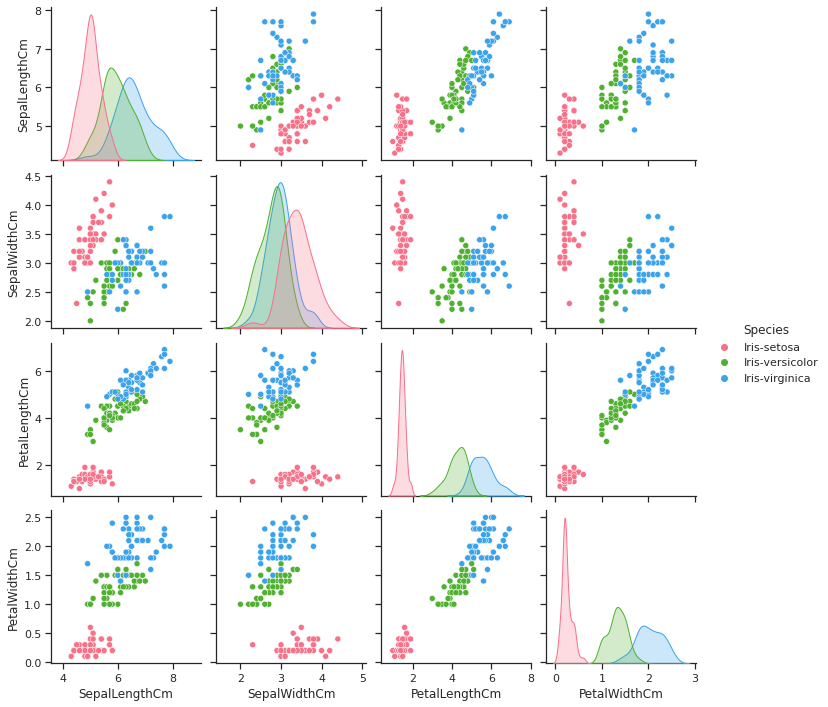

In [23]:
del data['Id']
sns.set(style='ticks', color_codes=True)
plot = sns.pairplot(data, hue='Species', palette='husl')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


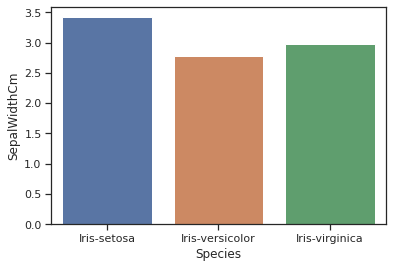

In [24]:
# Relationship between each species
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

In [25]:
count = data.groupby('Species').count()
count

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


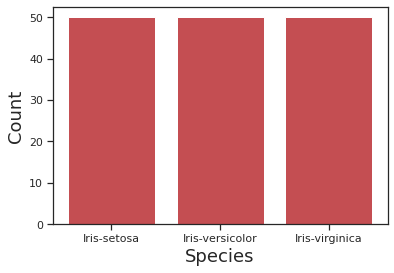

In [26]:
species = [x for x, df in data.groupby('Species')]

plt.bar(species, count['SepalLengthCm'], color='r')
plt.xlabel('Species', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [27]:
# Preprocessing: Integer encoding 
data['Species'] = data['Species'].replace(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], [0, 1, 2])

In [30]:
from sklearn.model_selection import train_test_split
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

print(x[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [32]:
# Separate train and test data
(x_train, x_test, y_train, y_test) = train_test_split(x, y, train_size=0.8, random_state=1)

# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [33]:
# Softmax regression
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# sgd = optimizers.SGD(learning_rate=0.01)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1, verbose=1, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 2.9379 - accuracy: 0.2917 - val_loss: 2.6332 - val_accuracy: 0.4000
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 2.5079 - accuracy: 0.1667 - val_loss: 2.3643 - val_accuracy: 0.2667
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 2.2491 - accuracy: 0.0917 - val_loss: 2.2147 - val_accuracy: 0.1000
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 2.0878 - accuracy: 0.0333 - val_loss: 2.0660 - val_accuracy: 0.0667
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.9620 - accuracy: 0.0250 - val_loss: 1.9061 - val_accuracy: 0.1000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 1.8341 - accuracy: 0.0333 - val_loss: 1.7793 - val_accuracy: 0.0667
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 1.7230 - accuracy: 0.0333 - val_loss: 1.6521 - val_accuracy: 0.0667

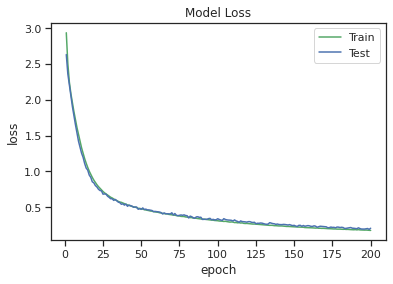

In [36]:
# Visualize test
epoch = range(1, len(history.history['accuracy']) + 1)
plt.plot(epoch, history.history['loss'], color='g')
plt.plot(epoch, history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [38]:
print('\n Test Accuray: {}'.format(model.evaluate(x_test, y_test)[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.2063 - accuracy: 0.9667

 Test Accuray: 0.9666666388511658
